In [1]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [2]:
# Libraries to use
from __future__ import division 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
# Import My own library for factor testing
import factorFilterFunctions as ff
#from config import *

In [4]:
%matplotlib inline

In [5]:
%load_ext line_profiler

In [6]:
# make sure that matplotib and seaborn can show Chinese
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['font.serif'] = ['SimHei']
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

In [7]:
# Files to use 
filenamePrice='LZ_GPA_DERI_AdjustedPriceForward_20.csv'
filenameST='LZ_GPA_SLCIND_ST_FLAG.csv'
filenameTradeday='LZ_GPA_SLCIND_TRADEDAYCOUNT.csv'
filenameStopFlag='LZ_GPA_SLCIND_STOP_FLAG.csv'
filenameIndu='LZ_GPA_INDU_ZX.csv'
filenameFCAP='LZ_GPA_VAL_A_FCAP.csv'
filenameAdjustFactor='LZ_GPA_CMFTR_CUM_FACTOR.csv'
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'
filenameZXIndustry = 'LZ_GPA_INDU_ZX.csv'
filenameZXExplanation = 'LZ_GPA_TMP_INDU_ZX.csv'

In [8]:
# Factors
# Value factor
filenamePE ='LZ_GPA_VAL_PE.csv'  # 市盈率   012-2016 Cum return 0.9(group1),1.4(group8) monotonicity: Normal
filenamePB ='LZ_GPA_VAL_PB.csv'  # 市净率   012-2016 Cum return 1.1(group2),0.1(group9) monotonicity: Good+
filenamePS = 'LZ_GPA_VAL_PS.csv' # 市销率   012-2016 Cum return 0.9(group0),0.3(group9) monotonicity: Good+
filenamePCF = 'LZ_GPA_VAL_PC.csv' # 市现率   2012-2016 Cum return 0.95(group0),0.35(group8) monotonicity: Normal
filenameADJPB ='Own_Factor_AdjustedPB-1d.csv' # 市值调整市净率 2012-2016 Cum return 1.1(group2),0.2(group9) monotonicity: Normal

# Growth factor
filenameYOYGR = 'LZ_GPA_FIN_IND_QFA_YOYGR.csv'  # 单季度.营业总收入同比增长率(%) 2012-2016 Cum return 1.1(group8),0.41(group1) monotonicity: Good+
filenameYOYNETPROFIT = 'LZ_GPA_FIN_IND_QFA_YOYNETPROFIT.csv' # 单季度.归属母公司股东的净利润同比增长率(%) 2012-2016 Cum return 1.2(group9),0.2(group1) monotonicity: Good
filenameYOYOCF = 'LZ_GPA_FIN_IND_YOYOCF.csv' # 同比增长率-经营活动产生的现金流量净额(%) 2012-2016 Cum return 0.98(group8),0.4(group2) monotonicity: Good
filenameYOYROE = 'LZ_GPA_FIN_IND_YOYROE.csv' # 同比增长率-净资产收益率(摊薄)(%) 2012-2016 Cum return 1.17(group7),0.18(group1) monotonicity: Normal
filenameYOYBPS = 'LZ_GPA_FIN_IND_YOYBPS.csv' # 相对年初增长率-每股净资产(%)  2012-2016 Cum return 0.85(group4),0.5(group0) monotonicity: Normal

# Financial factor
filenameCAPITALIZEDTODA = 'LZ_GPA_FIN_IND_CAPITALIZEDTODA.csv'  # 资本支出/折旧和摊销 2012-2016 Cum return 0.95(group0),0.6(group9) monotonicity: Normal+
filenameCASHRATIO = 'LZ_GPA_FIN_IND_CASHRATIO.csv' # 保守速动比率 2012-2016 Cum return 0.85(group0),0.53(group2) monotonicity: Normal+
filenameCASHTOLIQDEBT = 'LZ_GPA_FIN_IND_CASHTOLIQDEBT.csv' # 货币资金／流动负债 2012-2016 Cum return 0.8(group7),0.6(group8) monotonicity: Normal
filenameOCFTODEBT = 'LZ_GPA_FIN_IND_OCFTODEBT.csv' # 经营活动产生的现金流量净额/负债合计 2012-2016 Cum return 0.8(group0),0.55(group4) monotonicity: Normal
filenamePROFITTOOP = 'LZ_GPA_FIN_IND_PROFITTOOP.csv' # 利润总额／营业收入 2012-2016 Cum return 0.84(group3),0.23(group9) monotonicity: Normal
filenamePROFITTOOPTTM ='LZ_GPA_FIN_DERI_COMBO_EBTTOOR_TTM.csv' # # 利润总额／营业收入(TTM) 2012-2016 Cum return 0.72(group8),0.41(group1) monotonicity: Good

filenameBERYRATIO = 'LZ_GPA_DERI_BerryRatio.csv' #边际毛利/营运开支 2012-2016  monotonicity: bad ,not useful at all

# Momentum factor
filenameTRUEMOM = 'LZ_GPA_USR_MOM.csv' # 真动量 2012-2016 Cum return 1.0(group3), - 0.3(group9) monotonicity: Normal+
filenameMOM1M = 'LZ_GPA_DERI_Momentum_1M.csv' # 一月反转 2012-2016 Cum return 0.85(group0), - 0.2(group9) monotonicity: Good
filenameMOM3M = 'LZ_GPA_TURNOVER_TurnoverAvg_3M.csv' # 三月反转 2012-2016 Cum return 0.65(group7), 0.4(group9) monotonicity: Normal
filenamePVO = 'LZ_GPA_DERI_PVO.csv' # 一年偏度  2012-2016 Cum return 0.47(group0), -0.3(group9) monotonicity: Good
filenameABORMALVOLUME = 'LZ_GPA_DERI_NormalizedAbormalVolume.csv' # 归一化异常交易量  2012-2016 Cum return 0.7(group0), 0.1(group9) monotonicity: Normal
filenameSKEW = 'LZ_GPA_DERI_TSKEW.csv' # 斜率   2012-2016 Cum return 1.1(group0), 0.25(group8) monotonicity: Good+
filenameMACD = 'LZ_GPA_DERI_MACD.csv'  # MACD   2012-2016 Cum return 0.8(group3), -0.4(group9) monotonicity: Normal
finenameBB = 'LZ_GPA_DERI_BB_20.csv'  # Bolling_bands  2012-2016 Cum return 0.75(group3) , 0.05(group9)  monotonicity: Normal 

# Liquidity factor
filenameTURNOVER1M = 'LZ_GPA_TURNOVER_TurnoverAvg_1M.csv' # 一月换手率均值 2012-2016 Cum return 0.7(group4) , 0.1(group9)  monotonicity: Normal 
filenameAMOUNTAVG1M = 'LZ_GPA_DERI_AmountAvg_1M.csv'    #  日均成交额   2012-2016 Cum return 1.52(group0) , -0.27(group9)  monotonicity: Perfect
filenameILLIQ = 'LZ_GPA_DERI_ILLIQ.csv'         # 非流动性因子  2012-2016 Cum return 1.5(group9), - 0.07(group1) monotonicity: Perfect
filenameTURNOVER = 'LZ_GPA_VAL_TURN.csv'    #换手率 2012-2016 Cum return  0.78(group6), - 0.25(group9) monotonicity: Normal（除了第九组外其他差不多）
filenameOWNILLIQ ='Own_Factor_ILLQ-1d.csv' # 非流动性 2012-2016 Cum return 1.5(group9), - 0.25(group0) monotonicity: Perfect
filenameADJTURNOVER = 'LZ_GPA_DERI_adjustedTurnOver_20.csv' # 市值调整日均成交额 2012-2016 Cum return 1.25(group0), - 0.5(group9) monotonicity: Perfect

# Volatility factor
filenameRV1Y = 'LZ_GPA_DERI_RealizedVolatility_1Y.csv' # 一年收益波动   2012-2016 Cum return  0.65(group8), 0.4(group1) monotonicity : Normal
filenameOwnVol = 'Own_Factor_Volatility_90d.csv'   # 90天收益波动率     2012-2016 Cum return 0.65(group1), - 0.26(group9) monotonicity: Good
filenameAbove20 = 'Own_Factor_Above20MA_20d.csv'  # 高于20天MA的价格平均 2012-2016 Cum return 0.8(group1) , -0.4(group9)  monotonicity：Good

In [598]:
#
#filenameSpecificVol = 'Own_Factor_Specific_Volatility.csv' # 特质波动率
filenameAroon = 'Aroon_Allstocks.csv' 
filenameAdjTOTrue = 'Own_Factor_AdjustedTurnOver-1d.csv'# 真市值调整换手率 2012-2016 Cum return 1.0(group7), - 0.4(group9) monotonicity: Normal
filenameDDA = 'Own_Factor_DDA-1d.csv'  # 股票每日成交额(前复权)  2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filennameQFAEPS = 'LZ_GPA_FIN_IND_QFA_EPS.csv' # 单季度每股收益
filenameDDA20 = 'Own_Factor_DDA-20d.csv' # DDA二十天均值   2012-2016 Cum return 2.2(group0), - 0.6(group9) monotonicity: Perfect
filenameIDIVOL = 'Own_Factor_Idiosyncratic_Volatility.csv' # 特异波动率  2012-2016 Cum return 0.9(group1), 0(group9) monotonicity: Good+
filenameOwnSkewness = 'Own_Factor_Skewness_250d.csv'  # 250日偏度
filenamePPO ='LZ_GPA_DERI_PPO.csv' #

In [376]:
# Not good factors but maybe useful
filenameOVERVOL = 'Over_Heat_Volume.csv' 

In [377]:
# Constants
startTime =  datetime.strptime('20120401', '%Y%m%d')
endTime = datetime.strptime('20161230', '%Y%m%d')

path = ff.data_path
timeStampNum = 2500
thresholdNum = 0.2
HS300Index ='000300.SH' # HS300 index code
ZZ500Index = '000905.SH' #   ZZ500 index code

In [599]:
#
sololist = [filenamePPO ]
#
filenameDict = {'PE':filenamePE,'PB':filenamePB, 'PS':filenamePS, 'PCF':filenamePCF, 'YOYGR':filenameYOYGR,'YOYGRPROFIT':filenameYOYNETPROFIT, \
                'TRUE_MOM':filenameTRUEMOM, 'MOM_1M':filenameMOM1M , 'TURNOVER_1M':filenameTURNOVER1M }

In [600]:
stDF = pd.read_csv(path+filenameST,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
tradeDayDF = pd.read_csv(path+filenameTradeday,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
stopFlagDF = pd.read_csv(path+filenameStopFlag,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
indusDF = pd.read_csv(path+filenameZXIndustry,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
induExplanation = pd.read_csv(path+filenameZXExplanation,infer_datetime_format=True,parse_dates=[0],encoding='gb2312')

In [601]:
induExplanation

,LZ_GPA_TMP_INDU_ZX-t
0,石油石化
1,煤炭
2,有色金属
3,电力及公用事业
4,钢铁
5,基础化工
6,建筑
7,建材
8,轻工制造
9,机械


In [602]:
explanationDict = induExplanation.iloc[:,0].to_dict()

In [603]:
stDF.head()

,000005.SZ,600601.SH,600602.SH,600651.SH,600652.SH,600653.SH,600654.SH,600656.SH,000004.SZ,000002.SZ,...,603797.SH,603050.SH,603826.SH,300604.SZ,300640.SZ,002863.SZ,300641.SZ,603225.SH,603081.SH,603803.SH
LZ_GPA_SLCIND_ST_FLAG-t,,,,,,,,,,,,,,,,,,,,,
2012-04-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-04-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [604]:
## easy way to calculate the last day of the month
stDF['label'] = stDF.index.map(lambda x: (x.year,x.month))
#locationList=(stDF.groupby(['label']).size().cumsum()-1).values
#stDF.iloc[locationList].index
stDF.groupby(['label'])

In [605]:
priceData =  pd.read_csv(path+ filenamePrice ,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime]
benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0).loc[startTime:endTime][ZZ500Index]

In [606]:
LFCAPDF = np.log10(ff.getData(filenameFCAP, thresholdNum, startTime, endTime))

In [607]:
endOfMonthList = ff.getLastDayOfMonth(LFCAPDF.index)[1]

In [608]:
#%lprun -f ff.getLastDayOfMonth ff.getLastDayOfMonth(LFCAPDF.index)

In [609]:
activeReturnData =ff.calcReturn(priceData, endOfMonthList, benchmark = benchMarkData,activeReturn = True,logReturn = False)

In [610]:
# Generate the useles stock list
filterdict={}
for i in endOfMonthList:
    suspendList = ff.GetSTNewSuspend(i,stDF,tradeDayDF,stopFlagDF)
    filterdict[i] = suspendList
    print i, len(filterdict[i])

2012-04-27 00:00:00 376
2012-05-31 00:00:00 316
2012-06-29 00:00:00 322
2012-07-31 00:00:00 262
2012-08-31 00:00:00 244
2012-09-28 00:00:00 229
2012-10-31 00:00:00 208
2012-11-30 00:00:00 202
2012-12-31 00:00:00 192
2013-01-31 00:00:00 186
2013-02-28 00:00:00 186
2013-03-29 00:00:00 194
2013-04-26 00:00:00 188
2013-05-31 00:00:00 182
2013-06-28 00:00:00 190
2013-07-31 00:00:00 199
2013-08-30 00:00:00 196
2013-09-30 00:00:00 198
2013-10-31 00:00:00 205
2013-11-29 00:00:00 220
2013-12-31 00:00:00 207
2014-01-30 00:00:00 244
2014-02-28 00:00:00 267
2014-03-31 00:00:00 303
2014-04-30 00:00:00 284
2014-05-30 00:00:00 287
2014-06-30 00:00:00 302
2014-07-31 00:00:00 304
2014-08-29 00:00:00 329
2014-09-30 00:00:00 320
2014-10-31 00:00:00 344
2014-11-28 00:00:00 377
2014-12-31 00:00:00 367
2015-01-30 00:00:00 388
2015-02-27 00:00:00 397
2015-03-31 00:00:00 482
2015-04-30 00:00:00 482
2015-05-29 00:00:00 575
2015-06-30 00:00:00 637
2015-07-31 00:00:00 674
2015-08-31 00:00:00 628
2015-09-30 00:00

In [611]:
### Calculate the return of each group of given factor(solo factor)
totalGroupDict ={}
factorData = ff.getData(sololist[0], thresholdNum, startTime, endTime)
for date in endOfMonthList:
    factorDataTemp = factorData.loc[:date].tail()
    factorDataTemp = factorDataTemp[list(set(factorDataTemp.columns.tolist())- set(filterdict[date]))]
    #print factorDataTemp
    totalGroupDict[date] = ff.getStockGroup(factorDataTemp,Mean_Num=1)

In [612]:
ReturnDF = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None)
for group in ReturnDF.columns.tolist():
    for time in ReturnDF.index:
        ReturnDF.loc[time][group] = activeReturnData.loc[time][totalGroupDict[time][group]].mean()
ReturnDF.sort_index(axis=1,inplace=True)

In [613]:
shapeRatio = ReturnDF.mean()/ReturnDF.std()
shapeRatio

group_0    0.304567
group_1    0.341481
group_2    0.433068
group_3    0.402692
group_4    0.402776
group_5    0.295053
group_6    0.170127
group_7    0.101021
group_8   -0.032135
group_9   -0.354157
dtype: float64

In [614]:
### Method to calculate moving max drawdown
from numpy.lib.stride_tricks import as_strided
def windowed_view(x, window_size):
    """Creat a 2d windowed view of a 1d array.

    `x` must be a 1d numpy array.

    `numpy.lib.stride_tricks.as_strided` is used to create the view.
    The data is not copied.

    Example:

    >>> x = np.array([1, 2, 3, 4, 5, 6])
    >>> windowed_view(x, 3)
    array([[1, 2, 3],
           [2, 3, 4],
           [3, 4, 5],
           [4, 5, 6]])
    """
    y = as_strided(x, shape=(x.size - window_size + 1, window_size),
                   strides=(x.strides[0], x.strides[0]))
    return y

In [615]:
###
def rolling_max_dd(x, window_size, min_periods=1):
    """Compute the rolling maximum drawdown of `x`.

    `x` must be a 1d numpy array.
    `min_periods` should satisfy `1 <= min_periods <= window_size`.

    Returns an 1d array with length `len(x) - min_periods + 1`.
    """
    if min_periods < window_size:
        pad = np.empty(window_size - min_periods)
        pad.fill(x[0])
        x = np.concatenate((pad, x))
    y = windowed_view(x, window_size)
    #print y
    rolling_max_y = np.maximum.accumulate(y, axis=1)
    #print rolling_max_y
    dd = 1-y/rolling_max_y
    return np.abs(dd).max(axis=1)

In [616]:
max(rolling_max_dd(ReturnDF['group_0'].values,4, min_periods=1))

24.55191253396156

In [617]:
ReturnDF.cumsum().tail()

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2016-07-29,0.58572,0.52018,0.605595,0.544558,0.475302,0.316594,0.166916,0.0712389,-0.100966,-0.582342
2016-08-31,0.598981,0.525146,0.632571,0.556341,0.490638,0.333396,0.176052,0.0829516,-0.0748229,-0.572455
2016-09-30,0.613602,0.545568,0.647046,0.574878,0.500645,0.349054,0.178402,0.0881439,-0.0832104,-0.557426
2016-10-31,0.606021,0.550225,0.659559,0.595352,0.524298,0.365773,0.190245,0.0995571,-0.0771828,-0.574184
2016-11-30,0.579534,0.549388,0.66277,0.604219,0.550914,0.400743,0.218403,0.126317,-0.0442164,-0.536568


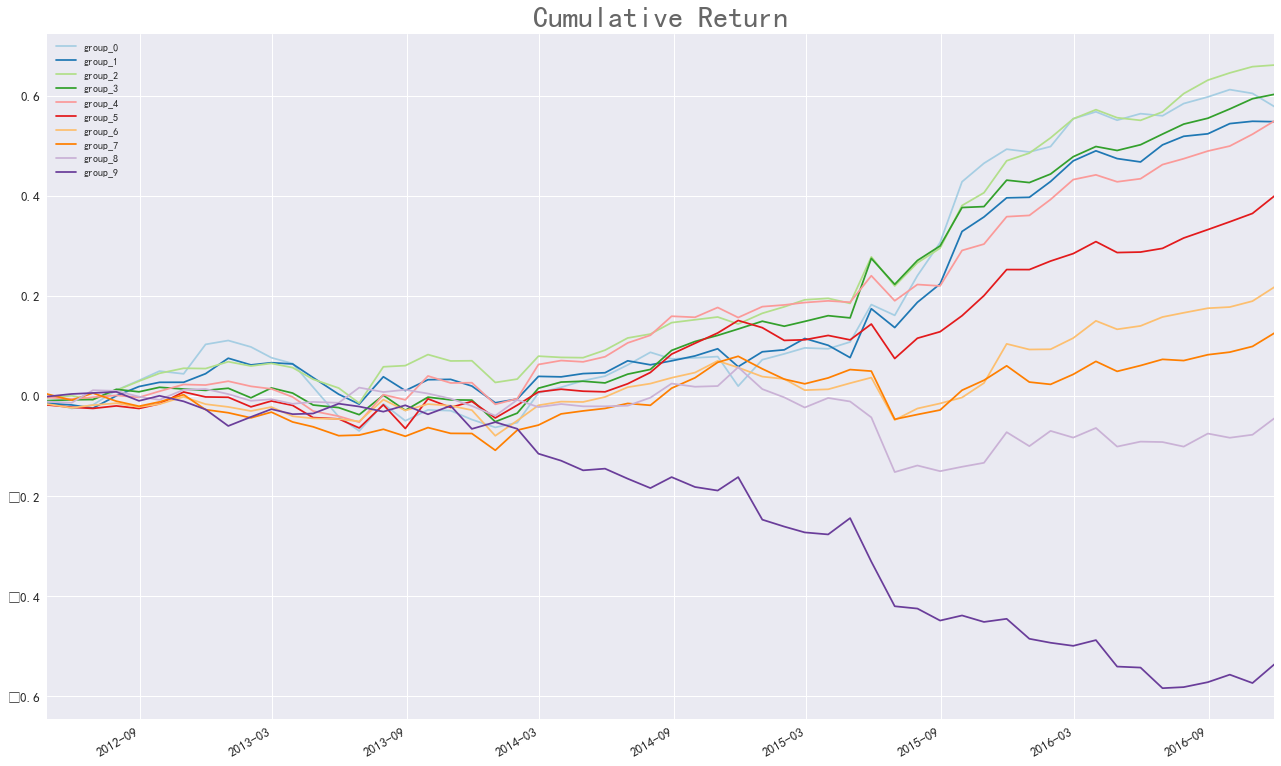

In [618]:
# simple cumulative return 
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
ReturnDF.astype(float).cumsum().plot(figsize=(22,14),ax=ax,  color=sns.color_palette("Paired",10),fontsize =13,title ='Cumulative Return')
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30)

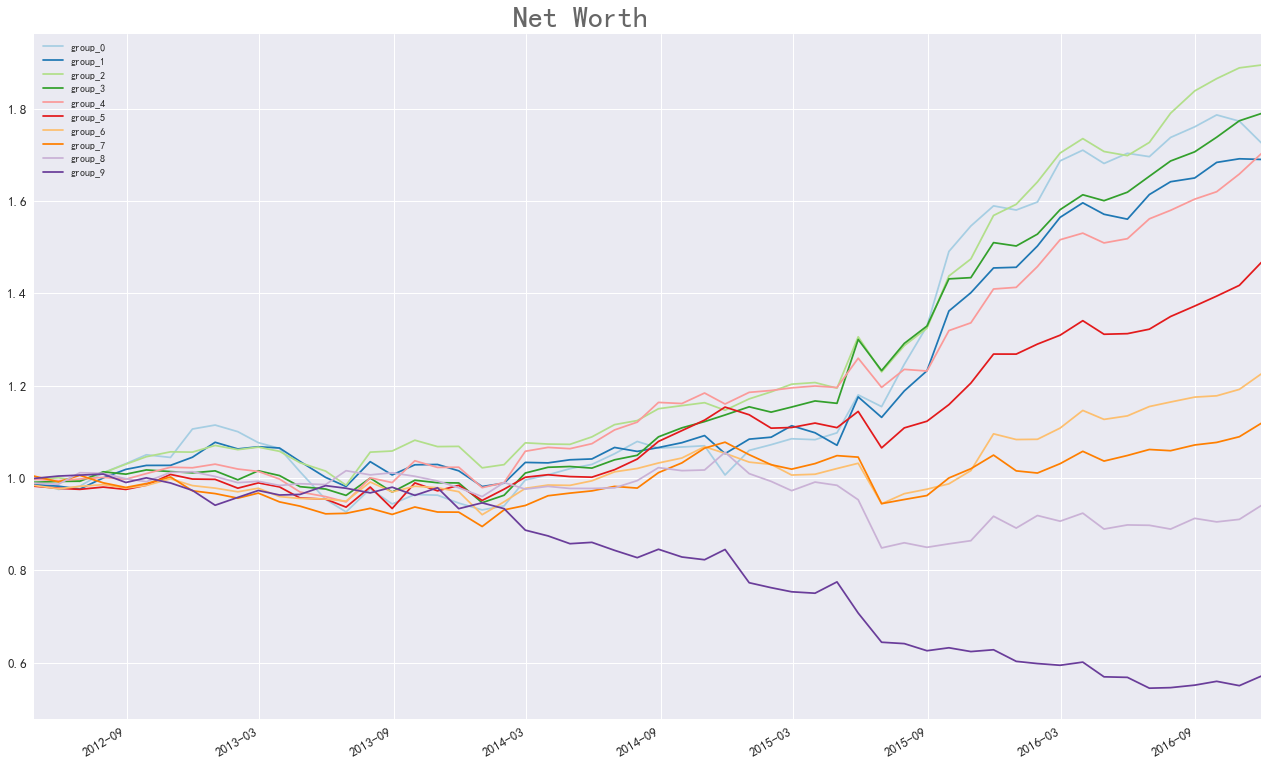

In [619]:
# Net worth plot 
fig = plt.figure(figsize=(18,14))
# Add a subplot
ax = fig.add_subplot(111)
(ReturnDF.astype(float)+1).cumprod().plot(figsize=(22,14),ax=ax,color=sns.color_palette("Paired",10),title ='Net Worth',fontsize =13)
ax.set_title(ax.get_title(),alpha=0.7, fontsize=30, ha='right')

In [620]:
ReturnDF.head()

,group_0,group_1,group_2,group_3,group_4,group_5,group_6,group_7,group_8,group_9
2012-04-27,-0.00999883,-0.0143724,-0.00317598,-0.00906178,-0.00233501,-0.0174334,-0.0157296,0.00445362,-0.0108303,-0.000808556
2012-05-31,-0.0147054,-0.0031984,0.00389336,0.00185552,-0.00334057,-0.00480775,-0.00758603,-0.0125937,-0.00236522,0.00521679
2012-06-29,0.00715365,-0.00640934,-0.00775249,0.000455601,0.00368251,-0.00229864,0.00533696,0.0143433,0.0251127,0.00200029
2012-07-31,0.0294372,0.0247134,0.0185322,0.0204809,0.00349556,0.00504232,0.00385182,-0.0161955,-0.00131437,0.00221442
2012-08-31,0.0196356,0.0185521,0.0185772,-0.00499708,-0.00391369,-0.00516476,-0.0075849,-0.0101392,-0.0116381,-0.0180093


In [621]:
ReturnForPlot =ReturnDF.copy()

In [622]:
ReturnForPlot.index = ReturnForPlot.index.map(lambda x:100*x.year+(1+x.month) if x.month < 12 else\
                                             100*(x.year+1)+1) ### this shows the real time

In [623]:
### the following part is to save return data of every factor into one Dataframe

totalGroupDict ={}
finalDF = pd.DataFrame()
countNum = 0
for i,j in filenameDict.iteritems():
    
    for date in endOfMonthList:
        factorData = ff.getData(j, timeStampNum, thresholdNum)
        factorDataTemp = factorData.loc[:date].tail()
        factorDataTemp = factorDataTemp[list(set(factorDataTemp.columns.tolist())- set(filterdict[date]))]
        #print factorDataTemp
        totalGroupDict[date] = ff.getStockGroup(factorDataTemp,Mean_Num=1)
    ReturnDF = pd.DataFrame(index=endOfMonthList[:-1],columns=totalGroupDict.values()[0].keys(),data=None)
    for group in ReturnDF.columns.tolist():
        for time in ReturnDF.index:
            ReturnDF.loc[time][group] = activeReturnData.loc[time][totalGroupDict[time][group]].mean()
    ReturnDF['factorName'] = i
    if countNum ==0:
        finalDF = ReturnDF
    else:
        finalDF=finalDF.append(ReturnDF)
    countNum+=1
finalDF.sort_index(axis=1,inplace=True)
    #totalGroupDict

In [624]:
#finalDF.shape

In [625]:
#---------------- the following part shows the show the difference of a risk factor across different market capitalzation size----#
#-------------  and different industries ------#

In [626]:
# show the difference of a risk factor through different market capitalzation size
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the tuple of the groups
# Inputs: 
# capdata: DATAFRAME ,the LFCAP DATA
# datelist: LIST, the datelist of the end month
def getGroupsbyCap(capdata, datelist):
    capdict ={}
    for date in datelist:
        capdataindice = capdata.loc[date]
        lower = capdataindice.quantile(1/3)
        upper = capdataindice.quantile(2/3)
        smallcap = capdataindice[capdataindice<=lower].index
        midcap = capdataindice[(lower<capdataindice) & (capdataindice<=upper)].index
        hugecap = capdataindice[capdataindice>upper].index
        capdict[date] = (smallcap,midcap,hugecap)
    return capdict

In [627]:
# industry number
grouplabel = np.random.choice(29,10,replace=False)
grouplabel

array([ 3, 20,  1, 13, 18, 25, 24, 26, 10, 23])

In [628]:
# show the difference of a risk factor through different industry
# capdata should not contain Nan value
# Return: DICTIONARY, the KEY is the date and the Value is the DICTIONARY of the groups of each industry on that day
# Inputs: 
# datelist: LIST, the datelist of the end month
# grouplable: LIST, the industry label,usually 3 of them is constant and other 3 is randomed  alike [2,3,6,15,18,25]
# industryDF: DATAFRAME,the industry dataframe(could )
def getIndustryDict(datelist,grouplabel,industryDF):
    industrydict = {}
    industryDF = industryDF.loc[datelist]
    for date in datelist:
        industryDFindice = industryDF.loc[date]
        industrydict[date] = {label:industryDFindice[industryDFindice == label].index for label in grouplabel}
    return industrydict

In [629]:
industryDict = getIndustryDict(endOfMonthList,grouplabel,indusDF)

In [630]:
capDict=getGroupsbyCap(LFCAPDF,endOfMonthList)

In [631]:
templist=[endOfMonthList,['mean','median','std']]
capGroupsDF = pd.DataFrame(data=None, columns=['small','mid','huge'],index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)
indusGroupDF  = pd.DataFrame(data=None, columns=grouplabel,index=pd.MultiIndex.from_product(templist,names=['time','stats']),dtype=float)

In [632]:
for date in endOfMonthList:
    factorindice = factorData.loc[date]
    smallindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][0]))]
    midindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][1]))]
    hugeindice = factorindice.loc[list(set(factorindice.index) & set(capDict[date][2]))]
    capGroupsDF.loc[date,'small'] = [smallindice.mean(),smallindice.median(),smallindice.std()]
    capGroupsDF.loc[date,'mid'] = [midindice.mean(),midindice.median(),midindice.std()]
    capGroupsDF.loc[date,'huge'] = [hugeindice.mean(),hugeindice.median(),hugeindice.std()]
    for i in grouplabel:
        #print grouplabel
        inDFIndice = factorindice.loc[list(set(factorindice.index) & set(industryDict[date][i]))]
        indusGroupDF.loc[date,i] = [inDFIndice.mean(),inDFIndice.median(),inDFIndice.std()]
indusGroupDF.rename(columns = {i:u''+explanationDict[i]+'' for i in grouplabel},inplace=True)

In [633]:
indusGroupDF.head(10)

电力及公用事业        银行        煤炭      商贸零售      食品饮料        通信  \
time       stats                                                                
2012-04-27 mean   -0.000455 -0.002784 -0.007731  0.011019 -0.002550  0.006913   
           median  0.000100  0.000358 -0.009511  0.006601 -0.004812  0.005462   
           std     0.022649  0.021497  0.015856  0.027551  0.021390  0.023485   
2012-05-31 mean    0.005800 -0.004827 -0.001936  0.001461  0.007584  0.001050   
           median  0.000958 -0.000938 -0.011112  0.003223  0.005659 -0.002729   
           std     0.028575  0.037088  0.033188  0.026838  0.030286  0.028331   
2012-06-29 mean   -0.019240 -0.022393 -0.020292 -0.016228  0.010731 -0.019337   
           median -0.022067 -0.021441 -0.026754 -0.020244  0.006518 -0.023136   
           std     0.022242  0.029367  0.025325  0.026632  0.031297  0.028914   
2012-07-31 mean   -0.039425 -0.023259 -0.042249 -0.042165 -0.000090 -0.043345   

                      电子元器件       计算机      电力设备      交通运输  
time       stats                                           
2012-04-27 mean    0.008813  0.009868  0.002471  0.030075  
           median  0.004616  0.009292  0.004386  0.027055  
           std     0.017090  0.020100  0.026725  0.031821  
2012-05-31 mean    0.007656 -0.002137  0.006987  0.020744  
           median  0.005447 -0.002149  0.006204  0.021017  
           std     0.015049  0.022596  0.026944  0.028208  
2012-06-29 mean   -0.011075 -0.020230 -0.018117 -0.001004  
           median -0.010172 -0.024169 -0.016287 -0.001258  
           std     0.017813  0.021892  0.023261  0.030653  
2012-07-31 mean   -0.024960 -0.044707 -0.045767 -0.031304

In [634]:
capGroupsDF.head()

small       mid      huge
time       stats                               
2012-04-27 mean    0.001437  0.007210  0.007849
           median  0.003970  0.005579  0.004638
           std     0.030974  0.026111  0.028096
2012-05-31 mean   -0.004812  0.002044  0.007624
           median -0.005033  0.000486  0.004117

In [635]:
newstack = capGroupsDF.stack().unstack('stats').reset_index()
newstack = newstack.rename(columns = {'level_1':'cap'})
newstack = newstack.pivot_table(index='time',columns='cap')

In [636]:
newstack.head()

stats           mean                        median                      \
cap             huge       mid     small      huge       mid     small   
time                                                                     
2012-04-27  0.007849  0.007210  0.001437  0.004638  0.005579  0.003970   
2012-05-31  0.007624  0.002044 -0.004812  0.004117  0.000486 -0.005033   
2012-06-29 -0.010615 -0.016080 -0.014587 -0.013717 -0.019077 -0.018184   
2012-07-31 -0.028893 -0.036363 -0.036530 -0.031013 -0.040503 -0.035841   
2012-08-31 -0.026357 -0.023928 -0.030130 -0.028022 -0.026309 -0.032510   

stats            std                      
cap             huge       mid     small  
time                                      
2012-04-27  0.028096  0.026111  0.030974  
2012-05-31  0.028936  0.029620  0.032411  
2012-06-29  0.029412  0.027592  0.029215  
2012-07-31  0.034682  0.034449  0.029708  
2012-08-31  0.030110  0.029498  0.025388

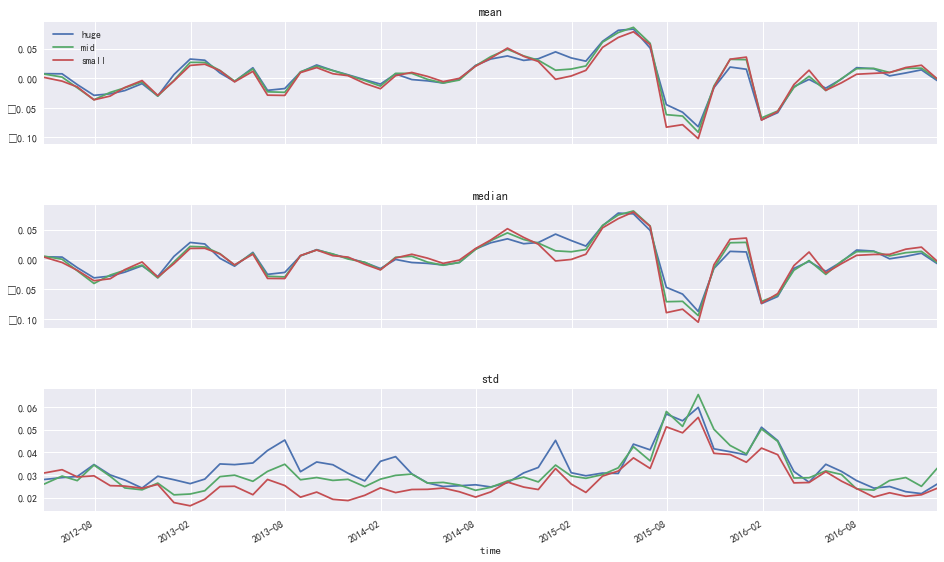

In [637]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstack.columns.levels[0],range(len(newstack.columns.levels[0]))):
    newstack[label].plot(ax=axs[num],legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [638]:
newstackInd = indusGroupDF.stack().unstack('stats').reset_index()
newstackInd = newstackInd.rename(columns = {'level_1':'industry'})
newstackInd = newstackInd.pivot_table(index='time',columns='industry')

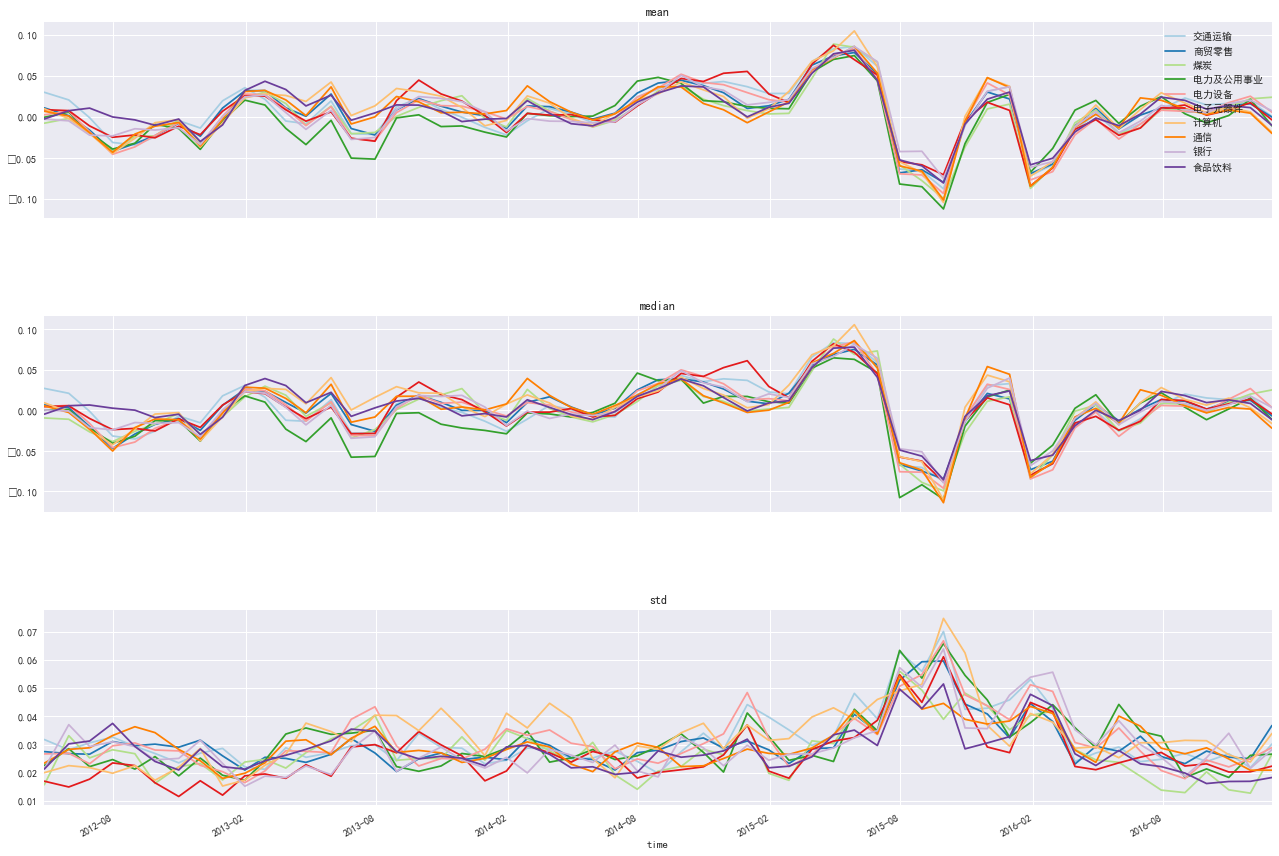

In [639]:
fig, axs = plt.subplots(3,1, figsize=(22, 16), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(newstackInd.columns.levels[0],range(len(newstackInd.columns.levels[0]))):
    newstackInd[label].plot(ax=axs[num],color=sns.color_palette("Paired",10),legend=False)
    axs[num].set_title(label)
axs[0].legend()

In [640]:
capcopy=capGroupsDF.copy()
copydata=capcopy.reset_index()

In [641]:
copydata.pivot_table(index='time',columns='stats').head()

small                           mid                      \
stats           mean    median       std      mean    median       std   
time                                                                     
2012-04-27  0.001437  0.003970  0.030974  0.007210  0.005579  0.026111   
2012-05-31 -0.004812 -0.005033  0.032411  0.002044  0.000486  0.029620   
2012-06-29 -0.014587 -0.018184  0.029215 -0.016080 -0.019077  0.027592   
2012-07-31 -0.036530 -0.035841  0.029708 -0.036363 -0.040503  0.034449   
2012-08-31 -0.030130 -0.032510  0.025388 -0.023928 -0.026309  0.029498   

                huge                      
stats           mean    median       std  
time                                      
2012-04-27  0.007849  0.004638  0.028096  
2012-05-31  0.007624  0.004117  0.028936  
2012-06-29 -0.010615 -0.013717  0.029412  
2012-07-31 -0.028893 -0.031013  0.034682  
2012-08-31 -0.026357 -0.028022  0.030110

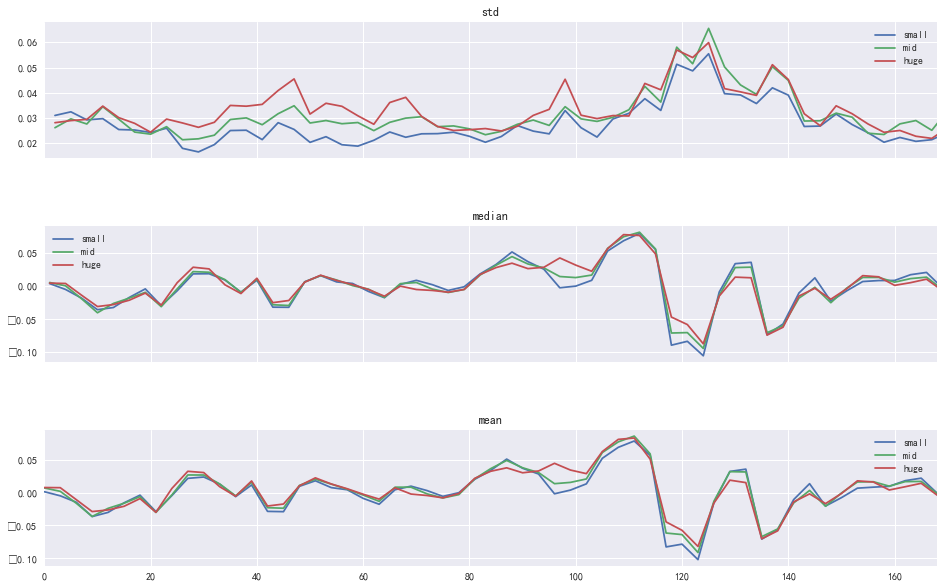

In [642]:
fig, axs = plt.subplots(3,1, figsize=(16, 10), facecolor='w', edgecolor='k',sharex=True)
fig.subplots_adjust(hspace = .5, wspace=.001)
for label,num in zip(set(copydata['stats']),range(len(set(copydata['stats'])))):
    #print label,num
    dataslice = copydata[copydata['stats']==label]
    dataslice.plot(ax=axs[num])
    axs[num].set_title(label)